In [1]:
# general packages
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import os 
import json
import itertools
import random

# specific packages
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.lines import Line2D
from matplotlib.pyplot import xticks
from scipy.optimize import curve_fit
import matplotlib.ticker as tck
from sklearn.metrics import mean_squared_error
import matplotlib.lines as mlines
from sklearn.linear_model import LinearRegression
from matplotlib.patches import Patch
from matplotlib.font_manager import FontProperties
from scipy.spatial.distance import euclidean

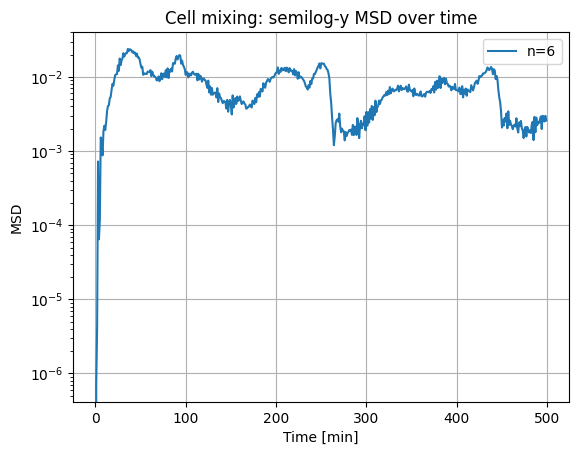

In [15]:
# plot MSD for turbulence motion

with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240211_turbulencemotioninsphere/20240211_turbulencemotioninsphere_noadhesion_target50s1000_motion_path.json", 'r') as f1:
    motion_data = json.load(f1)

# Function to calculate squared displacement
def calculate_squared_displacement(data):
    squared_displacement = {}
    for cell, positions in data.items():
        squared_displacement[cell] = [0]  # Initialize with 0 displacement for the first time step
        prev_position = np.array(positions[0])
        for position in positions[1:]:
            current_position = np.array(position)
            displacement = np.linalg.norm(current_position - prev_position)**2
            squared_displacement[cell].append(displacement)
            prev_position = current_position
    return squared_displacement

# Function to average squared displacement over cells
def average_squared_displacement(data):
    num_time_steps = len(next(iter(data.values())))
    avg_squared_displacement = [0] * num_time_steps
    for time_step in range(num_time_steps):
        total_squared_displacement = 0
        for cell_positions in data.values():
            total_squared_displacement += cell_positions[time_step]
        avg_squared_displacement[time_step] = total_squared_displacement / len(data)
    return avg_squared_displacement

# Calculate squared displacement for each cell
squared_displacement_data = calculate_squared_displacement(motion_data)

# Average squared displacement over cells
avg_squared_displacement = average_squared_displacement(squared_displacement_data)

# Plotting
time_steps = range(len(avg_squared_displacement))
plt.semilogy(time_steps, avg_squared_displacement, label="n=6")
plt.xlabel("Time [min]")
plt.ylabel("MSD")
plt.title("Cell mixing: semilog-y MSD over time")
plt.legend()
plt.grid(True)
plt.show()


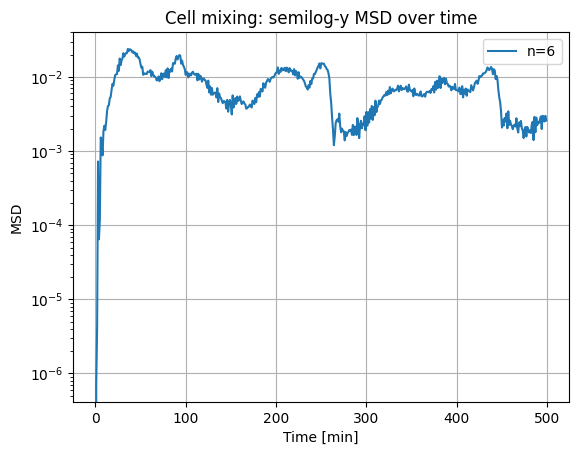

In [32]:
# plot MSD for turbulence motion

with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240211_turbulencemotioninsphere/20240211_turbulencemotioninsphere_noadhesion_target50s1000seed10_motion_path.json", 'r') as f1:
    motion_data = json.load(f1)

# Function to calculate squared displacement
def calculate_squared_displacement(data):
    squared_displacement = {}
    for cell, positions in data.items():
        squared_displacement[cell] = [0]  # Initialize with 0 displacement for the first time step
        prev_position = np.array(positions[0])
        for position in positions[1:]:
            current_position = np.array(position)
            displacement = np.linalg.norm(current_position - prev_position)**2
            squared_displacement[cell].append(displacement)
            prev_position = current_position
    return squared_displacement

# Function to average squared displacement over cells
def average_squared_displacement(data):
    num_time_steps = len(next(iter(data.values())))
    avg_squared_displacement = [0] * num_time_steps
    for time_step in range(num_time_steps):
        total_squared_displacement = 0
        for cell_positions in data.values():
            total_squared_displacement += cell_positions[time_step]
        avg_squared_displacement[time_step] = total_squared_displacement / len(data)
    return avg_squared_displacement

# Calculate squared displacement for each cell
squared_displacement_data = calculate_squared_displacement(motion_data)

# Average squared displacement over cells
avg_squared_displacement = average_squared_displacement(squared_displacement_data)

# Plotting
time_steps = range(len(avg_squared_displacement))
plt.semilogy(time_steps, avg_squared_displacement, label="n=6")
plt.xlabel("Time [min]")
plt.ylabel("MSD")
plt.title("Cell mixing: semilog-y MSD over time")
plt.legend()
plt.grid(True)
plt.show()


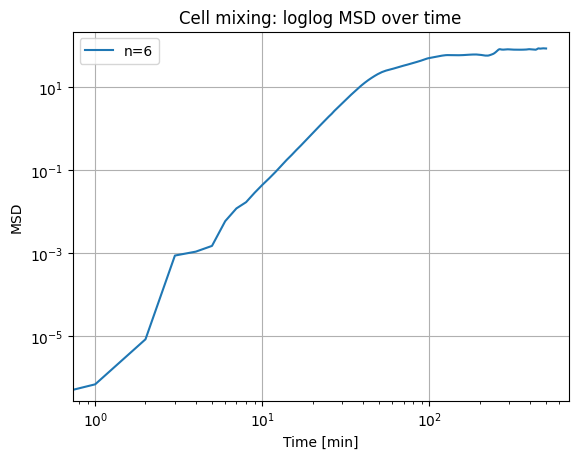

In [36]:
# Function to calculate mean squared displacement from the initial position

with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240211_turbulencemotioninsphere/20240211_turbulencemotioninsphere_noadhesion_target50s1000seed1_motion_path.json", 'r') as f1:
    motion_data1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240211_turbulencemotioninsphere/20240211_turbulencemotioninsphere_noadhesion_target50s1000seed10_motion_path.json", 'r') as f1:
    motion_data2 = json.load(f1)

def calculate_msd_from_initial(data):
    num_time_steps = len(next(iter(data.values())))
    num_cells = len(data)
    msd_from_initial = [0] * num_time_steps
    initial_positions = {cell: np.array(positions[0]) for cell, positions in data.items()}
    for time_step in range(num_time_steps):
        total_squared_displacement = 0
        for cell, positions in data.items():
            current_position = np.array(positions[time_step])
            displacement_from_initial = np.linalg.norm(current_position - initial_positions[cell])**2
            total_squared_displacement += displacement_from_initial
        msd_from_initial[time_step] = total_squared_displacement / num_cells
    return msd_from_initial

# Calculate MSD from the initial position
msd_from_initial = calculate_msd_from_initial(motion_data)

# Plotting
time_steps = range(len(avg_squared_displacement))
plt.loglog(time_steps, msd_from_initial, label="n=6")
plt.xlabel("Time [min]")
plt.ylabel("MSD")
plt.title("Cell mixing: loglog MSD over time")
plt.legend()
plt.grid(True)
plt.show()


dict_keys(['cell_A1', 'cell_A2', 'cell_A3', 'cell_A4', 'cell_A5', 'cell_A6'])


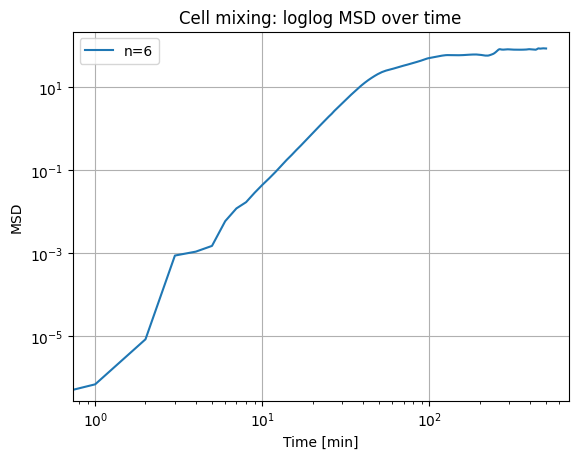

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Load motion data from the first file
with open("/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240211_turbulencemotioninsphere/20240211_turbulencemotioninsphere_noadhesion_target50s1000_motion_path.json", 'r') as f1:
    motion_data1 = json.load(f1)

# Load motion data from the second file
with open("/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240211_turbulencemotioninsphere/20240211_turbulencemotioninsphere_noadhesion_target50s1000seed10_motion_path.json", 'r') as f2:
    motion_data2 = json.load(f2)

# Concatenate motion data dictionaries
motion_data = {**motion_data1, **motion_data2}

print(motion_data.keys())

# Function to calculate mean squared displacement from the initial position
def calculate_msd_from_initial(data):
    num_time_steps = len(next(iter(data.values())))
    num_cells = len(data)
    msd_from_initial = [0] * num_time_steps
    initial_positions = {cell: np.array(positions[0]) for cell, positions in data.items()}
    for time_step in range(num_time_steps):
        total_squared_displacement = 0
        for cell, positions in data.items():
            current_position = np.array(positions[time_step])
            displacement_from_initial = np.linalg.norm(current_position - initial_positions[cell])**2
            total_squared_displacement += displacement_from_initial
        msd_from_initial[time_step] = total_squared_displacement / num_cells
    return msd_from_initial

# Calculate MSD from the initial position for the combined data
msd_from_initial = calculate_msd_from_initial(motion_data)

# Plotting
time_steps = range(len(msd_from_initial))
plt.loglog(time_steps, msd_from_initial, label="n=6")
plt.xlabel("Time [min]")
plt.ylabel("MSD")
plt.title("Cell mixing: loglog MSD over time")
plt.legend()
plt.grid(True)
plt.show()


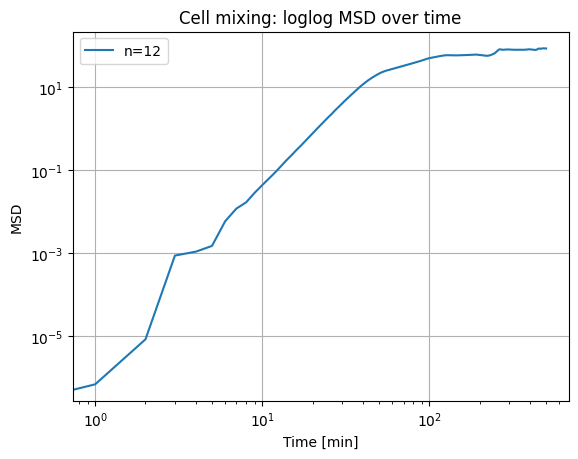

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Load motion data from the first file
with open("/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240211_turbulencemotioninsphere_seeds/20240211_turbulencemotioninsphere_seed10_motion_path.json", 'r') as f1:
    motion_data = json.load(f1)

# Function to calculate mean squared displacement from the initial position
def calculate_msd_from_initial(data):
    num_time_steps = len(next(iter(data.values())))
    num_cells = len(data)
    msd_from_initial = [0] * num_time_steps
    initial_positions = {cell: np.array(positions[0]) for cell, positions in data.items()}
    for time_step in range(num_time_steps):
        total_squared_displacement = 0
        for cell, positions in data.items():
            current_position = np.array(positions[time_step])
            displacement_from_initial = np.linalg.norm(current_position - initial_positions[cell])**2
            total_squared_displacement += displacement_from_initial
        msd_from_initial[time_step] = total_squared_displacement / num_cells
    return msd_from_initial

# Calculate MSD from the initial position for the combined data
msd_from_initial = calculate_msd_from_initial(motion_data)

# Plotting
time_steps = range(len(msd_from_initial))
plt.loglog(time_steps, msd_from_initial, label="n=12")
plt.xlabel("Time [min]")
plt.ylabel("MSD")
plt.title("Cell mixing: loglog MSD over time")
plt.legend()
plt.grid(True)
plt.show()


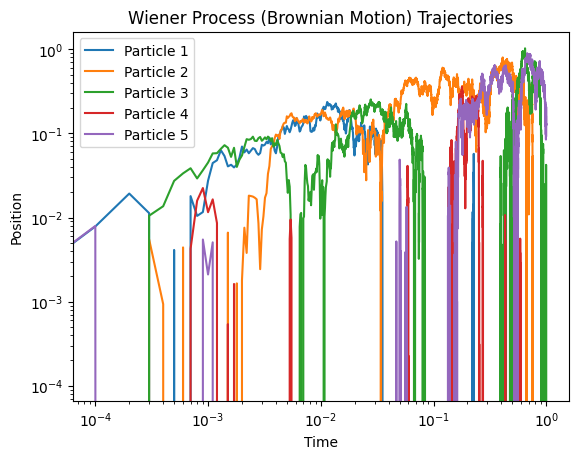

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu = 0  # Drift coefficient
sigma = 1  # Diffusion coefficient
T = 1  # Total time
N = 10000  # Number of time steps
dt = T / N  # Time step size
num_particles = 5  # Number of particles

# Initialize arrays to store positions and time for each particle
t_values = np.linspace(0, T, N+1)
X_values = np.zeros((num_particles, N+1))

# Generate Wiener process (Brownian motion) for each particle using Euler-Maruyama method
for p in range(num_particles):
    for i in range(N):
        Z = np.random.normal(0, 1)  # Sample from standard normal distribution
        dX = mu * dt + sigma * np.sqrt(dt) * Z  # Increment
        X_values[p, i+1] = X_values[p, i] + dX  # Update position

# Plot trajectories of the Wiener processes for each particle
for p in range(num_particles):
    plt.loglog(t_values, X_values[p], label=f'Particle {p+1}')

plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Wiener Process (Brownian Motion) Trajectories')
plt.legend()
plt.show()


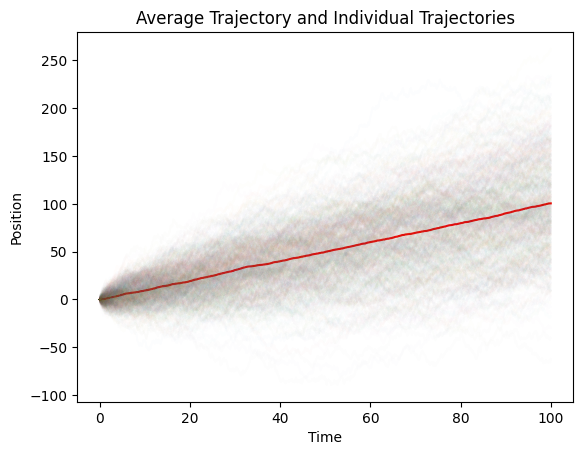

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu = 1  # Drift coefficient
sigma = 5  # Diffusion coefficient
T = 100  # Total time
N = 1000  # Number of time steps
dt = T / N  # Time step size
num_particles = 500  # Number of particles

# Initialize arrays to store positions and time for each particle
t_values = np.linspace(0, T, N+1)
X_values = np.zeros((num_particles, N+1))

# Generate Wiener process (Brownian motion) for each particle using Euler-Maruyama method
for p in range(num_particles):
    for i in range(N):
        Z = np.random.normal(0, 1)  # Sample from standard normal distribution
        dX = mu * dt + sigma * np.sqrt(dt) * Z  # Increment
        X_values[p, i+1] = X_values[p, i] + dX  # Update position

# Compute average trajectory over particles
average_trajectory = np.mean(X_values, axis=0)

# Plot average trajectory
plt.plot(t_values, average_trajectory, label='Average Trajectory', color='red')

# Plot trajectories of the Wiener processes for each particle
for p in range(num_particles):
    plt.plot(t_values, X_values[p], alpha=0.01, label=f'Particle {p+1}')

plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Average Trajectory and Individual Trajectories')
plt.show()
